# Amaç :
Bu data setinde benim amacım sıçanların verilen bilgilerine bakarak yaşlarını tahmin etmeye yarayan model geliştirmek.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

İlk etapta datayı analiz etmek için gerekli olan kütüphaneleri import ettim.

In [2]:
df = pd.read_csv("14-possum.csv")

In [3]:
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


case : observation number

site : The site number where the possum was trapped. (YAKALANDIĞI YER NUMARASI)

Pop : Population, either Vic (Victoria) or other (New South Wales or Queensland).

sex : Gender, either m (male) or f (female).

age : age

hdlngth : Head length, in mm.

skullw : Skull width, in mm. (KAFATASI)

totlngth : Total length, in cm.

taill : Tail length, in cm.

footlgth : foot length

earconch : ear conch length (KULAK KABUĞU UZUNLUĞU)

eye : distance from medial canthus to lateral canthus of right eye (sağ gözün iç ve dış göz kapaklarının arasındaki mesafe)

chest : chest girth (in cm)

belly : belly girth (in cm) (GÖBEK)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [7]:
df.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

Toplam 3 tane boş hücre varmış. Bunların neler olduğunu inceleyelim.

In [10]:
df[df.isnull().any(axis = 1)]    # Buna bakarak içerisinde en az 1 tane boş hücre olan satırları görebiliyorum.

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
40,41,2,Vic,f,5.0,88.4,57.0,83.0,36.5,NaN,40.3,15.9,27.0,30.5
43,44,2,Vic,m,NaN,85.1,51.5,76.0,35.5,70.3,52.6,14.4,23.0,27.0
45,46,2,Vic,m,NaN,91.4,54.4,84.0,35.0,72.8,51.2,14.4,24.5,35.0


Boş olan satır sayısı sadece 3 olduğu için bunları silebilirim diye düşünüyorum. Toplam 114 satır vardı ve 3 tanesini silmek modelime büyük etki etmez diye düşünüyorum.

In [11]:
df = df.dropna().reset_index(drop = True)    # Boşluk olan tüm satırları sildim ve geride kalanların indexlerini güncelledim.

In [13]:
df.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [16]:
df["sex"].unique()

array(['m', 'f'], dtype=object)

In [17]:
df["Pop"].unique()

array(['Vic', 'other'], dtype=object)

Burada cinsiyet ve bölge kategorik değişkenlerden oluşuyor. Bunları 0 ve 1 olarak atayarak numerik olarak dönüştürebilirim. Veya daha önce gördüğüm encoding işlemlerini yapabilirim.

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
labelEncoder = LabelEncoder()

In [20]:
df["sex"] = labelEncoder.fit_transform(df["sex"])

In [21]:
df["Pop"] = labelEncoder.fit_transform(df["Pop"])

In [22]:
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,0,1,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,0,0,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,0,0,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,0,0,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,0,0,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


Label Encoder kullanarak 0 ve 1 değerlerine dönüştürdüm iki kolonu.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      101 non-null    int64  
 1   site      101 non-null    int64  
 2   Pop       101 non-null    int32  
 3   sex       101 non-null    int32  
 4   age       101 non-null    float64
 5   hdlngth   101 non-null    float64
 6   skullw    101 non-null    float64
 7   totlngth  101 non-null    float64
 8   taill     101 non-null    float64
 9   footlgth  101 non-null    float64
 10  earconch  101 non-null    float64
 11  eye       101 non-null    float64
 12  chest     101 non-null    float64
 13  belly     101 non-null    float64
dtypes: float64(10), int32(2), int64(2)
memory usage: 10.4 KB


Artık tüm değişkenlerim numerik değişkenler haline döndü.

In [25]:
df.corr()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
case,1.000000,0.972590,0.868030,0.257541,-0.192688,-0.227342,-0.134138,-0.361924,0.313060,-0.784031,-0.798400,-0.084774,-0.422289,-0.224667
site,0.972590,1.000000,0.892316,0.241195,-0.127688,-0.195820,-0.103363,-0.304642,0.372065,-0.781489,-0.818580,-0.040443,-0.380269,-0.195044
Pop,0.868030,0.892316,1.000000,0.207966,-0.080523,-0.041064,0.039545,-0.133877,0.481018,-0.791939,-0.925583,0.147726,-0.241328,-0.048246
sex,0.257541,0.241195,0.207966,1.000000,-0.057821,0.118705,0.104349,-0.152441,-0.029907,-0.137153,-0.133683,0.212078,-0.117863,-0.093835
age,-0.192688,-0.127688,-0.080523,-0.057821,1.000000,0.329505,0.285563,0.268297,0.120205,0.126190,0.066234,0.231857,0.335030,0.360816
hdlngth,-0.227342,-0.195820,-0.041064,0.118705,0.329505,1.000000,0.705901,0.670402,0.275155,0.415945,0.131576,0.354688,0.621068,0.545438
skullw,-0.134138,-0.103363,0.039545,0.104349,0.285563,0.705901,1.000000,0.506382,0.241027,0.297197,0.025293,0.314319,0.613842,0.444216
totlngth,-0.361924,-0.304642,-0.133877,-0.152441,0.268297,0.670402,0.506382,1.000000,0.563586,0.483174,0.181230,0.247150,0.556094,0.500558
taill,0.313060,0.372065,0.481018,-0.029907,0.120205,0.275155,0.241027,0.563586,1.000000,-0.114560,-0.387871,0.192341,0.152924,0.296206
footlgth,-0.784031,-0.781489,-0.791939,-0.137153,0.126190,0.415945,0.297197,0.483174,-0.114560,1.000000,0.782415,0.013869,0.486477,0.311970


<Axes: >

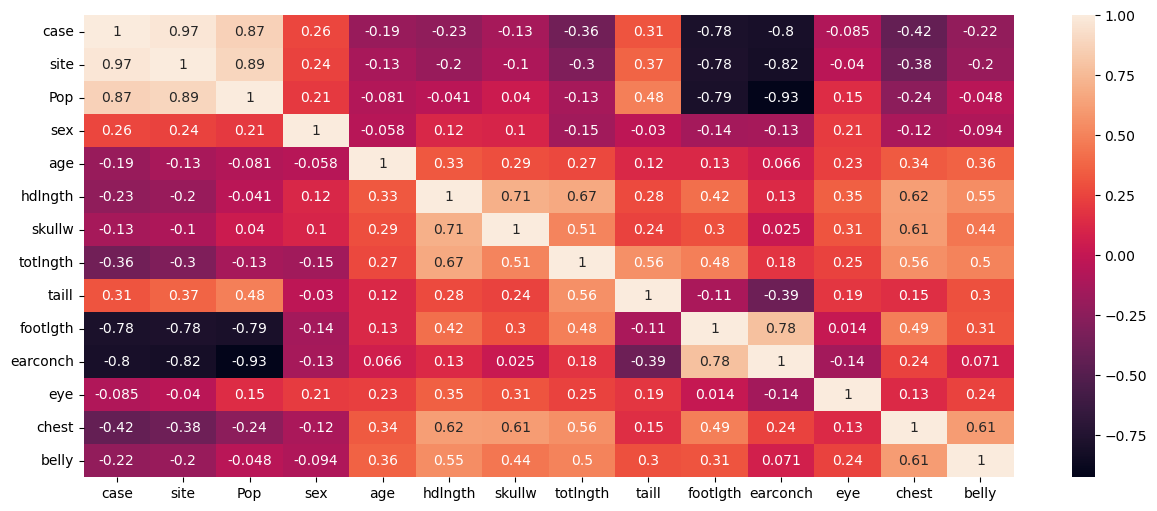

In [65]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), annot=True)


Mutlak değer olarak yüksek korelasyona sahip değişkenler modele olumsuz etki yapabilir. O yüzden çıkaracağım 0.95 üzeri korelasyona sahip olanları.

In [30]:
X = df.drop(['case','site','sex','Pop','age'], axis = 1)
y = df['age']

case ve site gereksiz etki etmeyecek şeylerdi. sex ve Pop'un tek tek age ile olan korelasyonları baya düşük. Modele etkisi çok çok az olacak o yüzden çıkardım. age ise zaten hedef değişken bu sebeple onu y içine atacağım.

In [31]:
X

,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...
96,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
97,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
98,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
99,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [32]:
y

0      8.0
1      6.0
2      6.0
3      6.0
4      2.0
      ... 
96     1.0
97     1.0
98     6.0
99     4.0
100    3.0
Name: age, Length: 101, dtype: float64

Şimdi train test bölünmesi yapacağım.

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=36)

In [35]:
X_train.shape

(80, 9)

In [36]:
X_test.shape

(21, 9)

In [37]:
X_train.corr()

,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
hdlngth,1.000000,0.657595,0.645936,0.289811,0.388009,0.050268,0.348487,0.617090,0.553249
skullw,0.657595,1.000000,0.415887,0.211199,0.221818,-0.068201,0.288717,0.558724,0.410358
totlngth,0.645936,0.415887,1.000000,0.529266,0.497493,0.194058,0.218405,0.519114,0.496435
taill,0.289811,0.211199,0.529266,1.000000,-0.069948,-0.364469,0.198616,0.065918,0.288638
footlgth,0.388009,0.221818,0.497493,-0.069948,1.000000,0.765923,-0.002762,0.504218,0.296450
earconch,0.050268,-0.068201,0.194058,-0.364469,0.765923,1.000000,-0.197483,0.252690,0.060633
eye,0.348487,0.288717,0.218405,0.198616,-0.002762,-0.197483,1.000000,0.122667,0.297872
chest,0.617090,0.558724,0.519114,0.065918,0.504218,0.252690,0.122667,1.000000,0.564300
belly,0.553249,0.410358,0.496435,0.288638,0.296450,0.060633,0.297872,0.564300,1.000000


Bağımsız değişkenler kendi aralarında çok korelasyonlu olsaydılar benzer olanları çıkaracaktım. Ama buradan bakınca 0.8 bile olmadığı gözüküyor.

In [40]:
def correlation_for_dropping(df, threshold):
    columns_to_drop = set()
    corr = df.corr()

    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i,j]) > threshold:
                columns_to_drop.add(corr.columns[i])

    return columns_to_drop

In [44]:
columns_dropping = correlation_for_dropping(X_train, 0.80)

In [45]:
columns_dropping

set()

# Scaling İşlemi

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler()

In [48]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Linear Regression

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
linear = LinearRegression()

In [52]:
linear.fit(X_train, y_train)

LinearRegression()

In [53]:
from sklearn.metrics import r2_score

R2 skoru :  0.20188190960958963


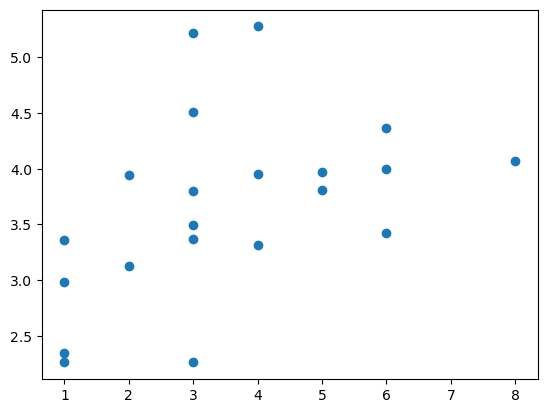

In [55]:
y_pred = linear.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R2 skoru : " , r2)
plt.scatter(y_test, y_pred)
plt.show()

# Lasso Regression

In [56]:
from sklearn.linear_model import LassoCV

In [59]:
lassocv = LassoCV(cv=5)

R2 skoru :  -0.03950000000000009


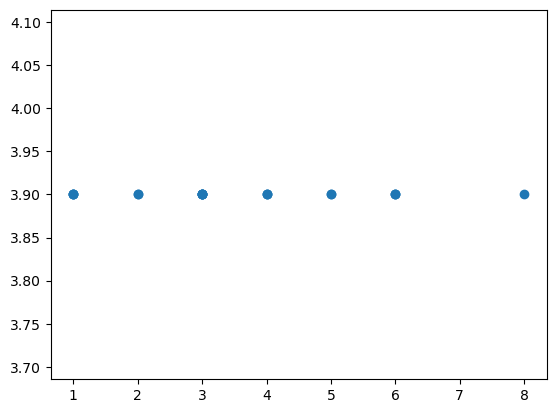

In [60]:
lassocv.fit(X_train, y_train)
y_pred = lassocv.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R2 skoru : " , r2)
plt.scatter(y_test, y_pred)
plt.show()

In [61]:
lassocv.coef_

array([ 0.,  0.,  0.,  0., -0., -0.,  0.,  0.,  0.])

# Ridge Regression

In [62]:
from sklearn.linear_model import RidgeCV

R2 skoru :  0.2443163994973171


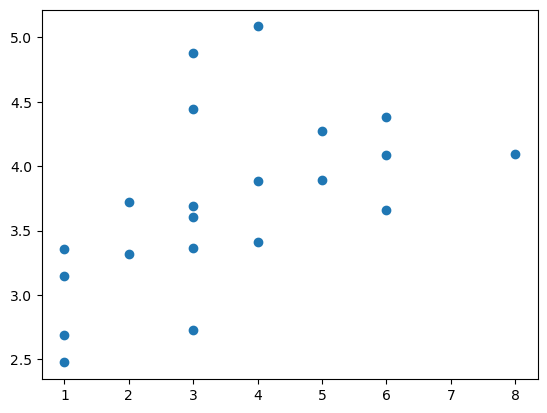

In [63]:
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train, y_train)
y_pred = ridgecv.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R2 skoru : " , r2)
plt.scatter(y_test, y_pred)
plt.show()